In [2]:
f = open("/Users/shreyanshrathore/Desktop/Data Science/2019-CS109A-master/docs/lectures/lecture3/data/top50.csv")
column_names = f.readline().strip().split(",")[1:] # puts names in a list
cleaned_column_names = [name for name in column_names] # removes the extraneous quotes
cleaned_column_names.insert(0, "ID")

dataset = []

# iterates through each line of the .csv file
for line in f:
    attributes = line.strip().split(",")
    
    # constructs a new dictionary for each line, and
    # appends this dictionary to the `dataset`;
    # thus, the dataset is a list of dictionaries (1 dictionary per song)
    dataset.append(dict(zip(cleaned_column_names, attributes)))

In [5]:
for song in dataset:
    if int(song["Length"]) > 240:
        print(song["ArtistName"], "-", song["TrackName"], "is", song["Length"], "seconds long")

Anuel AA - China is 302 seconds long
Bad Bunny - Callaita is 251 seconds long
Sech - Otro Trago - Remix is 288 seconds long
Chris Brown - No Guidance (feat. Drake) is 261 seconds long
J Balvin - LA CANCIÓN is 243 seconds long
Jhay Cortez - No Me Conoce - Remix is 309 seconds long
Lunay - Soltera - Remix is 266 seconds long


In [7]:
# Write code to print the most popular song(artist and track) - if ties show all tracks
max_score = -1
most_populars = set()
for song in dataset:
    if int(song["Popularity"]) > max_score:
        most_populars = set([str(song["ArtistName"] + "-" + song["TrackName"])])
        max_score = int(song["Popularity"])
    elif int(song["Popularity"]) == max_score:
        most_populars.add(str(song["ArtistName"] + "-" + song["Track.Name"]))
print(most_populars)

{'Billie Eilish-bad guy'}


In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

In [10]:
top50 = pd.read_csv("/Users/shreyanshrathore/Desktop/Data Science/2019-CS109A-master/docs/lectures/lecture3/data/top50.csv")
top50

,Unnamed: 0,TrackName,ArtistName,Genre,BeatsPerMinute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,Senorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [11]:
top50.columns

Index(['Unnamed: 0', 'TrackName', 'ArtistName', 'Genre', 'BeatsPerMinute', 'Energy', 'Danceability', 'Loudness', 'Liveness', 'Valence', 'Length', 'Acousticness', 'Speechiness', 'Popularity'], dtype='object')

In [12]:
len(top50.columns)

14

In [13]:
top50.describe()

,Unnamed: 0,BeatsPerMinute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,14.57738,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,1.00000,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,13.25000,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,25.50000,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,37.75000,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,50.00000,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


In [14]:
top50.dtypes

Unnamed: 0         int64
TrackName         object
ArtistName        object
Genre             object
BeatsPerMinute     int64
Energy             int64
Danceability       int64
Loudness           int64
Liveness           int64
Valence            int64
Length             int64
Acousticness       int64
Speechiness        int64
Popularity         int64
dtype: object

In [15]:
top50["Length"]

0     191
1     302
2     186
3     198
4     175
5     220
6     131
7     202
8     157
9     194
10    251
11    185
12    182
13    288
14    205
15    261
16    243
17    158
18    161
19    173
20    153
21    115
22    309
23    266
24    195
25    191
26    210
27    213
28    193
29    222
30    210
31    179
32    176
33    200
34    224
35    164
36    226
37    162
38    181
39    199
40    228
41    171
42    216
43    198
44    162
45    182
46    202
47    214
48    218
49    206
Name: Length, dtype: int64

In [16]:
top50['Length'].max()
top50['Length'].min()

115

In [17]:
top50['Length'].max()

309

In [18]:
top50['Length'].min()

115

In [19]:
top50['Length'].idxmax()

22

In [20]:
top50['Length'].idxmin()

21

In [21]:
top50['Length'] > 240

0     False
1      True
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10     True
11    False
12    False
13     True
14    False
15     True
16     True
17    False
18    False
19    False
20    False
21    False
22     True
23     True
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
Name: Length, dtype: bool

In [22]:
top50.loc[0]

Unnamed: 0                   1
TrackName             Senorita
ArtistName        Shawn Mendes
Genre             canadian pop
BeatsPerMinute             117
Energy                      55
Danceability                76
Loudness                    -6
Liveness                     8
Valence                     75
Length                     191
Acousticness                 4
Speechiness                  3
Popularity                  79
Name: 0, dtype: object

In [24]:
top50.loc[[0,2]]

,Unnamed: 0,TrackName,ArtistName,Genre,BeatsPerMinute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,Senorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85


In [25]:
top50.loc[top50['Length'] > 240 ]

,Unnamed: 0,TrackName,ArtistName,Genre,BeatsPerMinute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
10,11,Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93
13,14,Otro Trago - Remix,Sech,panamanian pop,176,79,73,-2,6,76,288,7,20,87
15,16,No Guidance (feat. Drake),Chris Brown,dance pop,93,45,70,-7,16,14,261,12,15,82
16,17,LA CANCIÓN,J Balvin,latin,176,65,75,-6,11,43,243,15,32,90
22,23,No Me Conoce - Remix,Jhay Cortez,reggaeton flow,92,79,81,-4,9,58,309,14,7,83
23,24,Soltera - Remix,Lunay,latin,92,78,80,-4,44,80,266,36,4,91


In [26]:
top50.loc[top50['Length'] > 240][['ArtistName', 'TrackName', 'Length']]

,ArtistName,TrackName,Length
1,Anuel AA,China,302
10,Bad Bunny,Callaita,251
13,Sech,Otro Trago - Remix,288
15,Chris Brown,No Guidance (feat. Drake),261
16,J Balvin,LA CANCIÓN,243
22,Jhay Cortez,No Me Conoce - Remix,309
23,Lunay,Soltera - Remix,266


In [29]:
top50.loc[top50['Popularity'].idxmax()]

Unnamed: 0                   10
TrackName               bad guy
ArtistName        Billie Eilish
Genre                electropop
BeatsPerMinute              135
Energy                       43
Danceability                 70
Loudness                    -11
Liveness                     10
Valence                      56
Length                      194
Acousticness                 33
Speechiness                  38
Popularity                   95
Name: 9, dtype: object

In [30]:
top50.iloc[top50['Popularity'].idxmax()]

Unnamed: 0                   10
TrackName               bad guy
ArtistName        Billie Eilish
Genre                electropop
BeatsPerMinute              135
Energy                       43
Danceability                 70
Loudness                    -11
Liveness                     10
Valence                      56
Length                      194
Acousticness                 33
Speechiness                  38
Popularity                   95
Name: 9, dtype: object

In [31]:
top50.sort_values("Popularity", ascending= False)

,Unnamed: 0,TrackName,ArtistName,Genre,BeatsPerMinute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
10,11,Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93
14,15,Money In The Grave (Drake ft. Rick Ross),Drake,canadian hip hop,101,50,83,-4,12,10,205,10,5,92
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
36,37,Otro Trago,Sech,panamanian pop,176,70,75,-5,11,62,226,14,34,91
21,22,Panini,Lil Nas X,country rap,154,59,70,-6,12,48,115,34,8,91
20,21,Piece Of Your Heart,MEDUZA,pop house,124,74,68,-7,7,63,153,4,3,91
19,20,Truth Hurts,Lizzo,escape room,158,62,72,-3,12,41,173,11,11,91


In [32]:
top50.iloc[5:6]

,Unnamed: 0,TrackName,ArtistName,Genre,BeatsPerMinute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84


In [33]:
top50.iloc[:,2]

0         Shawn Mendes
1             Anuel AA
2        Ariana Grande
3           Ed Sheeran
4          Post Malone
5           Ed Sheeran
6            Lil Tecca
7            Sam Smith
8            Lil Nas X
9        Billie Eilish
10           Bad Bunny
11            DJ Snake
12       Lewis Capaldi
13                Sech
14               Drake
15         Chris Brown
16            J Balvin
17         Post Malone
18                 Y2K
19               Lizzo
20              MEDUZA
21           Lil Nas X
22         Jhay Cortez
23               Lunay
24       Billie Eilish
25        Shawn Mendes
26         Tones and I
27           Ali Gatie
28        Daddy Yankee
29            J Balvin
30    The Chainsmokers
31       Ariana Grande
32              Maluma
33          Young Thug
34          Katy Perry
35       Martin Garrix
36                Sech
37          Ed Sheeran
38      Jonas Brothers
39                Lauv
40                Kygo
41        Taylor Swift
42           Lady Gaga
43         

In [34]:
top50.iloc[[0,2,3], [2,1]]

,ArtistName,TrackName
0,Shawn Mendes,Senorita
2,Ariana Grande,boyfriend (with Social House)
3,Ed Sheeran,Beautiful People (feat. Khalid)


In [35]:
top50[top50.ArtistName.isnull()]

,Unnamed: 0,TrackName,ArtistName,Genre,BeatsPerMinute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity


In [36]:
top50[top50.ArtistName.notnull()]

,Unnamed: 0,TrackName,ArtistName,Genre,BeatsPerMinute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,Senorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [37]:
grouped_df = top50.groupby('Genre')

In [39]:
top50.head()

,Unnamed: 0,TrackName,ArtistName,Genre,BeatsPerMinute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,Senorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [41]:
top50

,Unnamed: 0,TrackName,ArtistName,Genre,BeatsPerMinute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,Senorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [42]:
for key, item in grouped_df:
    print("Genre:", key, "(", len(grouped_df.get_group(key)), "items):", grouped_df.get_group(key), "\n\n")

Genre: atl hip hop ( 1 items):     Unnamed: 0                                  TrackName  ArtistName        Genre  BeatsPerMinute  Energy  Danceability  Loudness  Liveness  Valence  Length  Acousticness  Speechiness  Popularity
33          34  The London (feat. J. Cole & Travis Scott)  Young Thug  atl hip hop              98      59            80        -7        13       18     200             2           15          89 


Genre: australian pop ( 1 items):     Unnamed: 0     TrackName   ArtistName           Genre  BeatsPerMinute  Energy  Danceability  Loudness  Liveness  Valence  Length  Acousticness  Speechiness  Popularity
26          27  Dance Monkey  Tones and I  australian pop              98      59            82        -6        18       54     210            69           10          83 


Genre: big room ( 1 items):     Unnamed: 0                                          TrackName     ArtistName     Genre  BeatsPerMinute  Energy  Danceability  Loudness  Liveness  Valence  Leng

In [43]:
explicit_lyrics = pd.read_csv("/Users/shreyanshrathore/Desktop/Data Science/2019-CS109A-master/docs/lectures/lecture3/data/spotify_aux.csv")
explicit_lyrics

,Unnamed: 0,TrackName,ArtistName,ExplicitLanguage
0,1,Senorita,Shawn Mendes,True
1,2,China,Anuel AA,False
2,3,boyfriend (with Social House),Ariana Grande,True
3,4,Beautiful People (feat. Khalid),Ed Sheeran,False
4,5,Goodbyes (Feat. Young Thug),Post Malone,False
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,False
6,7,Ransom,Lil Tecca,True
7,8,How Do You Sleep?,Sam Smith,False
8,9,Old Town Road - Remix,Lil Nas X,True
9,10,bad guy,Billie Eilish,True


In [44]:
df_combined = pd.merge(explicit_lyrics, top50, on="TrackName")
df_combined.head(5)

,Unnamed: 0_x,TrackName,ArtistName_x,ExplicitLanguage,Unnamed: 0_y,ArtistName_y,Genre,BeatsPerMinute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,Senorita,Shawn Mendes,True,1,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,False,2,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,True,3,Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,False,4,Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,False,5,Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


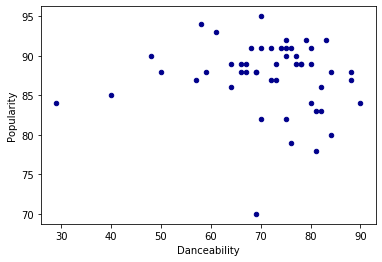

In [46]:
scatter_plot = top50.plot.scatter(x='Danceability', y='Popularity', c='DarkBlue')

In [47]:
top50.iloc[top50['Length'].idxmin()]

Unnamed: 0                 22
TrackName              Panini
ArtistName          Lil Nas X
Genre             country rap
BeatsPerMinute            154
Energy                     59
Danceability               70
Loudness                   -6
Liveness                   12
Valence                    48
Length                    115
Acousticness               34
Speechiness                 8
Popularity                 91
Name: 21, dtype: object

In [48]:
top50.sort_values("Length", ascending = True)[0:5]

,Unnamed: 0,TrackName,ArtistName,Genre,BeatsPerMinute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
21,22,Panini,Lil Nas X,country rap,154,59,70,-6,12,48,115,34,8,91
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
20,21,Piece Of Your Heart,MEDUZA,pop house,124,74,68,-7,7,63,153,4,3,91
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
17,18,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,dfw rap,90,48,76,-6,7,91,158,56,5,91


In [49]:
top50.sort_values("Length", ascending = True)[0:5]['Length'].mean()

142.8

In [52]:
def contains_null(df):
    for col in df.columns:
        if np.sum(df[col].isnull()) > 0:
            return True
    return False
contains_null(top50)

False

In [53]:
len(top50['Genre'].unique())

21

In [54]:
top50[(top50['Danceability'] > 80) & (top50['Popularity'] > 86)]

,Unnamed: 0,TrackName,ArtistName,Genre,BeatsPerMinute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
14,15,Money In The Grave (Drake ft. Rick Ross),Drake,canadian hip hop,101,50,83,-4,12,10,205,10,5,92
18,19,Lalala,Y2K,canadian hip hop,130,39,84,-8,14,50,161,18,8,88
44,45,Con Altura,ROSALÍA,r&b en espanol,98,69,88,-4,5,75,162,39,12,88


In [55]:
avg_speed = top50['BeatsPerMinute'].mean()
avg_popularity = top50['Popularity'].mean()
top50[(top50['BeatsPerMinute'] > avg_speed) & (top50['Popularity'] > avg_popularity)]

,Unnamed: 0,TrackName,ArtistName,Genre,BeatsPerMinute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95
10,11,Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93
16,17,LA CANCIÓN,J Balvin,latin,176,65,75,-6,11,43,243,15,32,90
18,19,Lalala,Y2K,canadian hip hop,130,39,84,-8,14,50,161,18,8,88
19,20,Truth Hurts,Lizzo,escape room,158,62,72,-3,12,41,173,11,11,91
20,21,Piece Of Your Heart,MEDUZA,pop house,124,74,68,-7,7,63,153,4,3,91
21,22,Panini,Lil Nas X,country rap,154,59,70,-6,12,48,115,34,8,91
24,25,bad guy (with Justin Bieber),Billie Eilish,electropop,135,45,67,-11,12,68,195,25,30,89


In [65]:
generes = top50['Genre'].unique()
generes

array(['canadian pop', 'reggaeton flow', 'dance pop', 'pop', 'dfw rap',
       'trap music', 'country rap', 'electropop', 'reggaeton',
       'panamanian pop', 'canadian hip hop', 'latin', 'escape room',
       'pop house', 'australian pop', 'edm', 'atl hip hop', 'big room',
       'boy band', 'r&b en espanol', 'brostep'], dtype=object)

In [73]:
scatter = top50.plot.scatter(x='Genre', y='top50['Genre'].unique()', c='DarkBlue')

SyntaxError: invalid syntax (<ipython-input-73-27e2003843e2>, line 1)

In [76]:
groupby_genre = top50.groupby('Genre')
groupby_genre.count()

,Unnamed: 0,TrackName,ArtistName,BeatsPerMinute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
Genre,,,,,,,,,,,,,
atl hip hop,1,1,1,1,1,1,1,1,1,1,1,1,1
australian pop,1,1,1,1,1,1,1,1,1,1,1,1,1
big room,1,1,1,1,1,1,1,1,1,1,1,1,1
boy band,1,1,1,1,1,1,1,1,1,1,1,1,1
brostep,2,2,2,2,2,2,2,2,2,2,2,2,2
canadian hip hop,3,3,3,3,3,3,3,3,3,3,3,3,3
canadian pop,2,2,2,2,2,2,2,2,2,2,2,2,2
country rap,2,2,2,2,2,2,2,2,2,2,2,2,2
dance pop,8,8,8,8,8,8,8,8,8,8,8,8,8
